Real-Time Data Integration Methods

Example using Python to simulate real-time data collection and  visualization of the real-time data.

Enter the city name to fetch the weather:  Durban


200
Weather in Durban:
Temperature: 28.51°C
Description: broken clouds
Humidity: 79%
Pressure: 1010 hPa
Wind Speed: 8.48 m/s


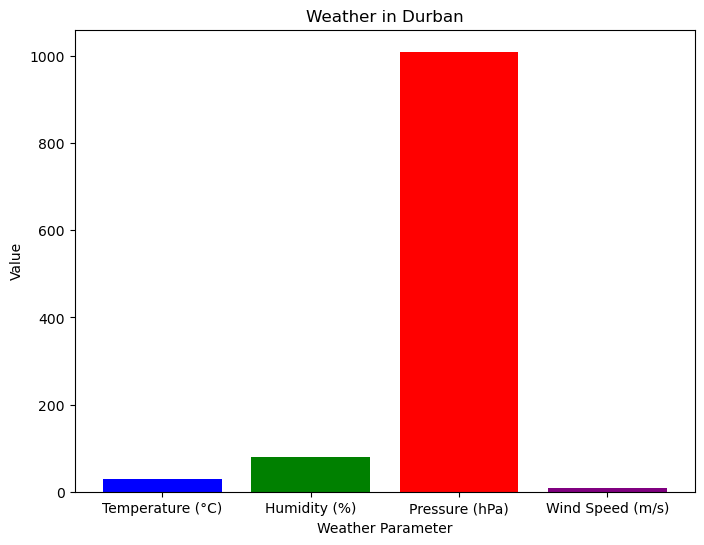

In [3]:
import requests
import matplotlib.pyplot as plt

# Replace with your actual OpenWeatherMap API Key
API_KEY = '266cb67c4e1d960e0fa37ffb34c72e88'  # Make sure to use your actual API key here

# Function to fetch weather data
def fetch_weather(city_name):
    # URL to fetch the current weather
    URL = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_KEY}&units=metric'
    
    # Send GET request to the OpenWeatherMap API
    response = requests.get(URL)
    print(response.status_code)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()
        # Check if the response contains the expected data
        if 'name' in data:
            # Extract the relevant weather information
            city_name = data['name']
            temperature = data['main']['temp']
            weather_description = data['weather'][0]['description']
            humidity = data['main']['humidity']
            pressure = data['main']['pressure']
            wind_speed = data['wind']['speed']
            
            # Display the weather information
            print(f"Weather in {city_name}:")
            print(f"Temperature: {temperature}°C")
            print(f"Description: {weather_description}")
            print(f"Humidity: {humidity}%")
            print(f"Pressure: {pressure} hPa")
            print(f"Wind Speed: {wind_speed} m/s")

            # Create a bar chart for the weather data
            labels = ['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)']
            values = [temperature, humidity, pressure, wind_speed]

            plt.figure(figsize=(8, 6))
            plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
            plt.title(f"Weather in {city_name}")
            plt.xlabel("Weather Parameter")
            plt.ylabel("Value")
            plt.show()

        else:
            print("Error: Missing 'name' key in the response data.")
            print(f"Response Data: {data}")  # Print the raw response for debugging
    else:
        # Handle failed request (status code other than 200)
        print(f"Failed to fetch data. Status Code: {response.status_code}")
        print(f"Response: {response.text}")  # Print the raw error message for debugging

# Ask the user for a city name
city = input("Enter the city name to fetch the weather: ")

# Call the function to fetch and display the weather data and graph
fetch_weather(city)
